In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('Downloads/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

<Axes: xlabel='Sex', ylabel='Count'>

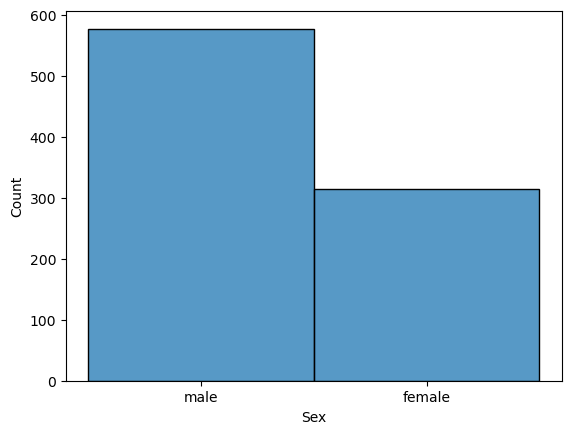

In [5]:
sns.histplot(data=titanic,x="Sex")

<Axes: xlabel='Pclass', ylabel='Count'>

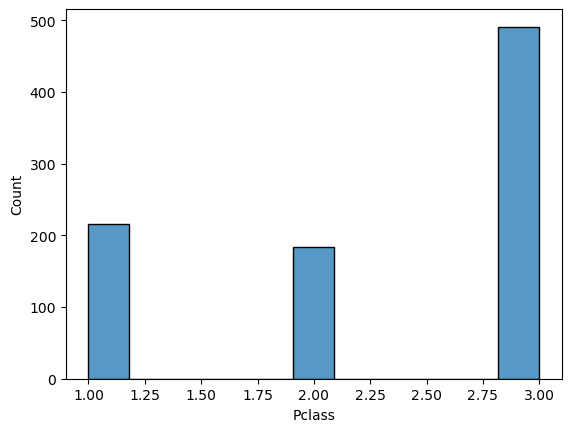

In [6]:
sns.histplot(data=titanic,x="Pclass")

<Axes: xlabel='Age', ylabel='Count'>

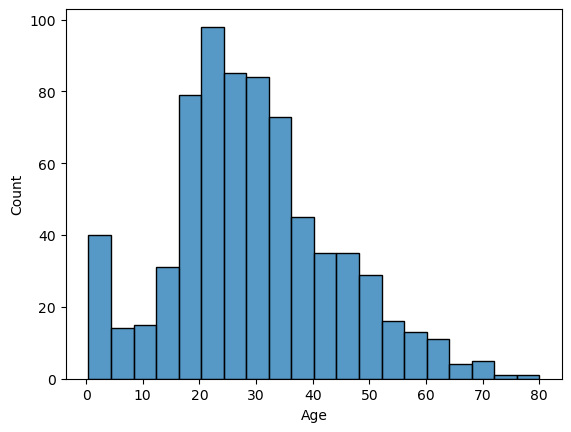

In [7]:
sns.histplot(data=titanic,x="Age")

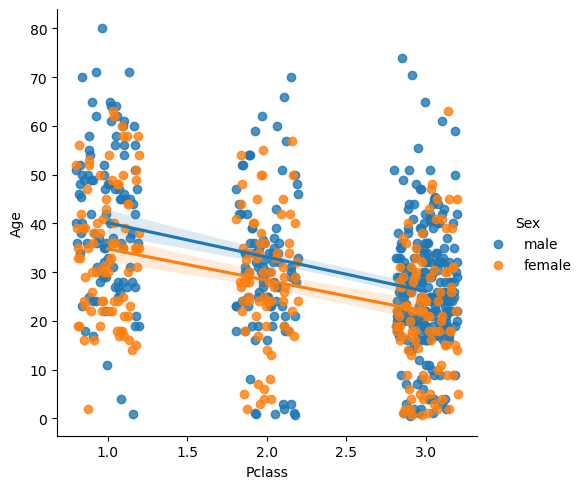

In [8]:
sns.lmplot(data=titanic,x="Pclass",y="Age",hue="Sex",x_jitter=0.2)

<Axes: xlabel='Pclass', ylabel='Count'>

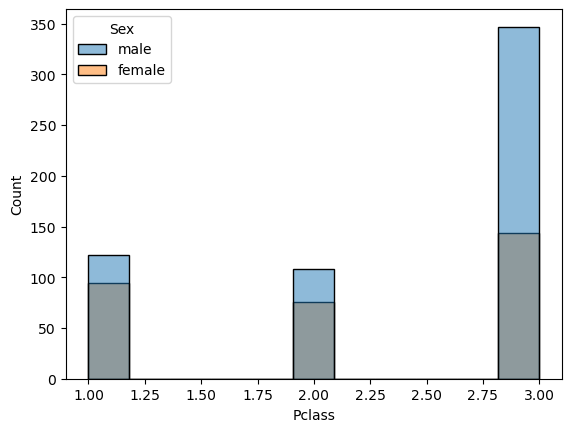

In [9]:
sns.histplot(data=titanic,x="Pclass",hue="Sex")

In [10]:
titanic["Ticket"] = pd.to_numeric(titanic["Ticket"], errors='coerce')

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       661 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


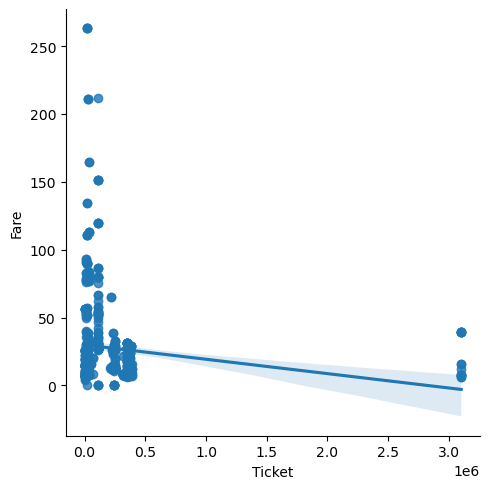

In [12]:
sns.lmplot(data=titanic,x="Ticket",y="Fare")

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S


<Axes: xlabel='Ticket', ylabel='Fare'>

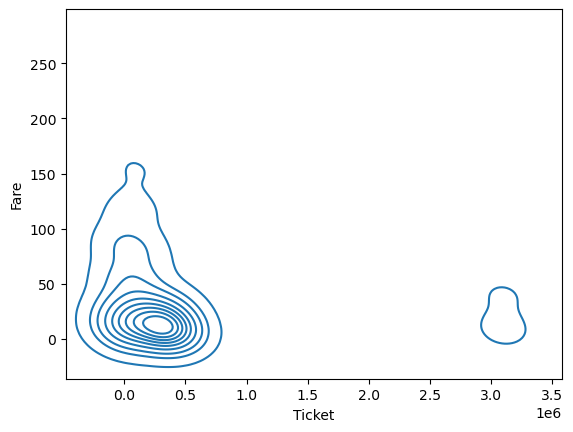

In [14]:
sns.kdeplot(data=titanic,x="Ticket",y="Fare")

In [15]:
def maturity(passenger):
    age,sex = passenger
    if age < 16 :
        return 'Child'
    else :
        return sex

titanic['Maturity'] = titanic[['Age','Sex']].apply(maturity,axis=1)
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Maturity
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877.0,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463.0,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909.0,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742.0,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736.0,30.0708,NaN,C,Child


<Axes: xlabel='Age', ylabel='Count'>

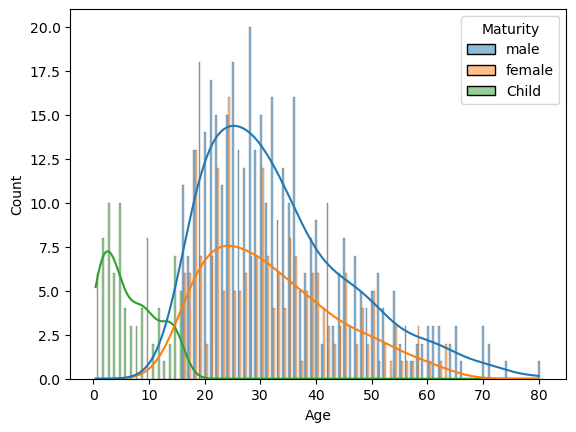

In [16]:
sns.histplot(data=titanic,x="Age",hue="Maturity",multiple="dodge", kde=True,discrete=True)

<Axes: xlabel='Pclass', ylabel='Count'>

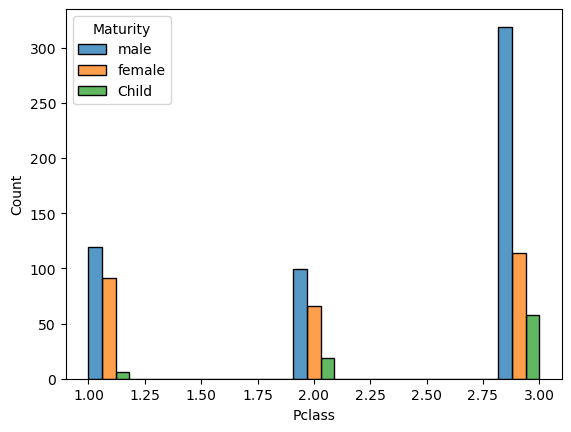

In [17]:
sns.histplot(data=titanic,x="Pclass",hue="Maturity",multiple="dodge")

In [18]:
titanic['Maturity'].value_counts()

male      537
female    271
Child      83
Name: Maturity, dtype: int64

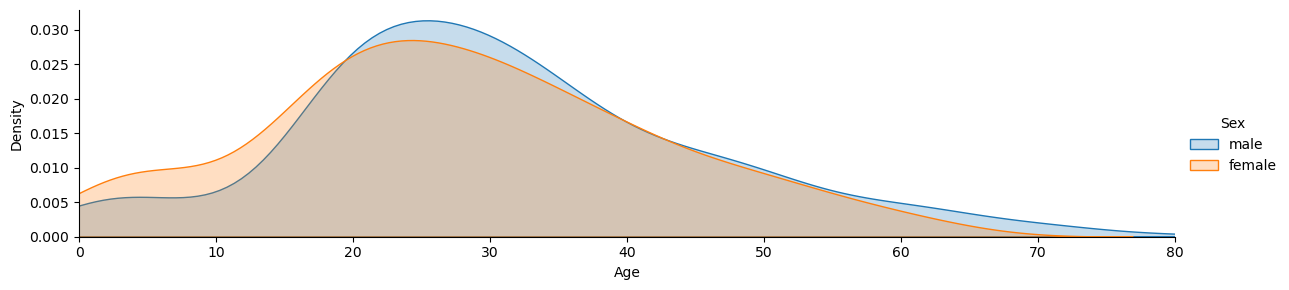

In [19]:
fig = sns.FacetGrid(titanic,hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

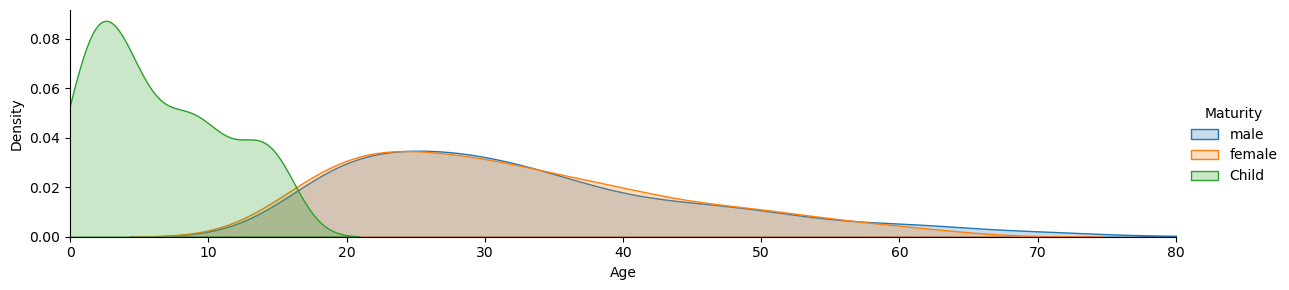

In [20]:
fig = sns.FacetGrid(titanic,hue="Maturity",aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

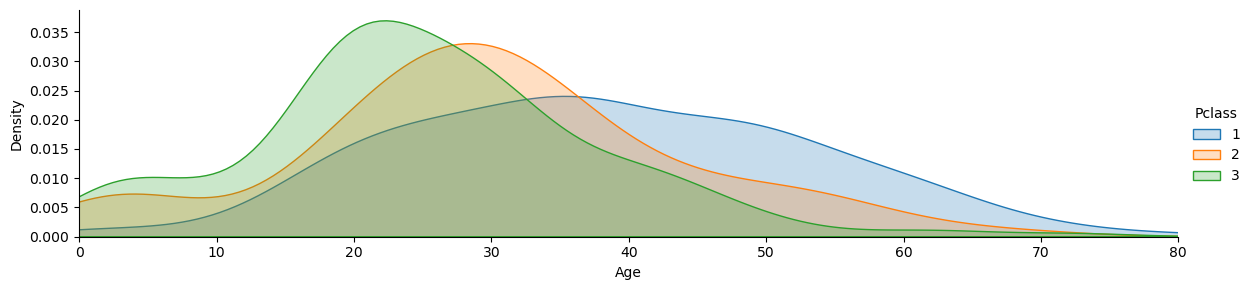

In [21]:
fig = sns.FacetGrid(titanic,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Maturity
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S,male


We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

In [23]:
deck = titanic['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [24]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin = DataFrame(levels)
cabin.columns = ['Cabin']
cabin

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


<Axes: xlabel='Cabin', ylabel='Count'>

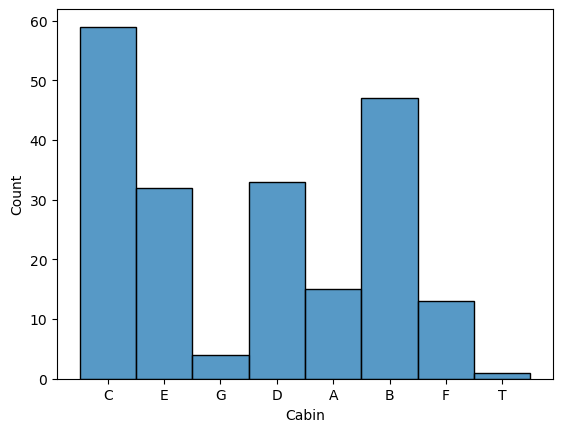

In [25]:
sns.histplot(data=cabin,x="Cabin")

<Axes: xlabel='Cabin', ylabel='Count'>

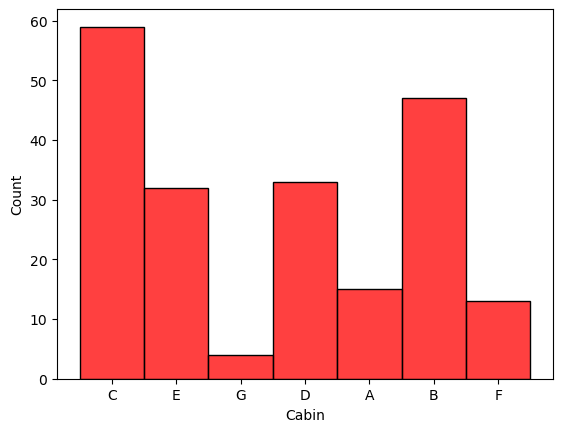

In [26]:
cabin = cabin[cabin.Cabin != 'T']
sns.histplot(data=cabin,x="Cabin",color='red')

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Maturity
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S,male


<Axes: xlabel='Pclass', ylabel='Count'>

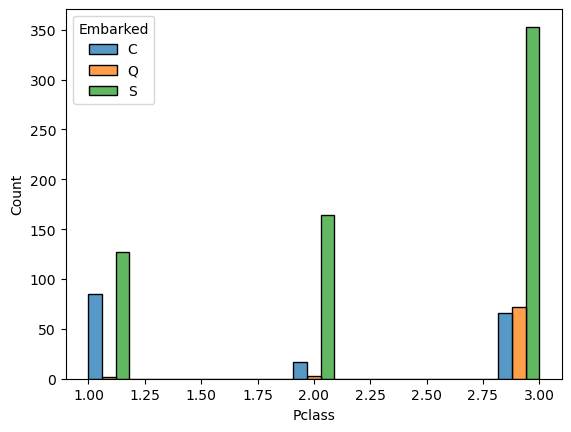

In [28]:
sns.histplot(data=titanic,x="Pclass",hue="Embarked",hue_order=['C','Q','S'],multiple="dodge")

4.) Who was alone and who was with family?

In [29]:
titanic['Status'] = titanic.Parch + titanic.SibSp
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Maturity,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S,male,0


In [30]:
def status_alone(alone_status):
    status = alone_status
    if status > 0:
        return 'With Family'
    else:
        return 'Alone'

titanic['Status'] = titanic['Status'].apply(status_alone)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Maturity,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S,male,Alone


<Axes: xlabel='Status', ylabel='Count'>

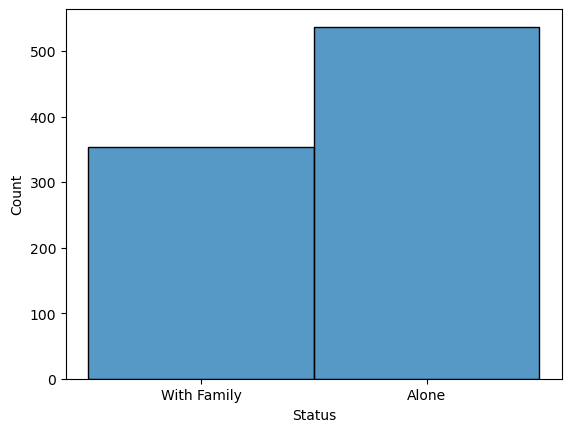

In [31]:
sns.histplot(data=titanic,x='Status',multiple='dodge')

In [34]:
titanic['Survivor'] = titanic.Survived.map({0:'no',1:'yes'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Maturity,Status,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S,male,Alone,no


<Axes: xlabel='Survivor', ylabel='Count'>

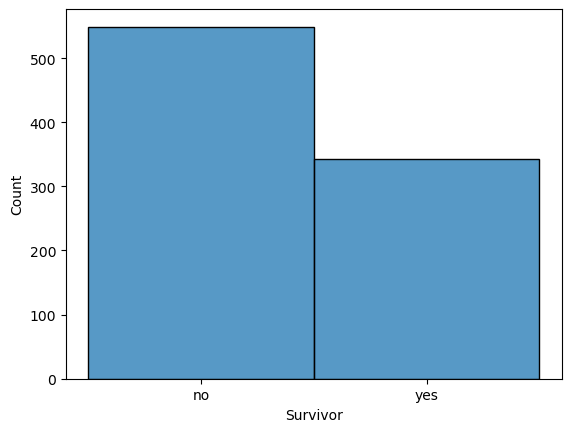

In [36]:
sns.histplot(data=titanic,x='Survivor',multiple='dodge')

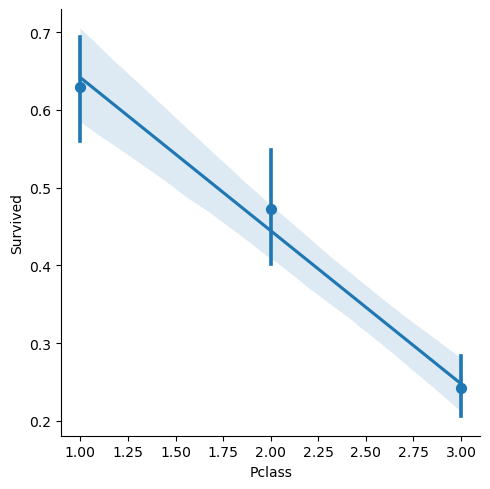

In [46]:
sns.lmplot(data=titanic,x='Pclass',y='Survived',x_estimator=np.mean)

<Axes: xlabel='Pclass', ylabel='Survived'>

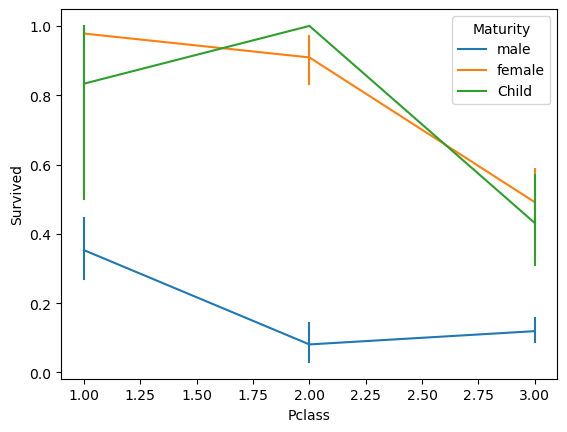

In [73]:
sns.lineplot(data=titanic,x='Pclass',y='Survived',hue='Maturity',err_style='bars',markers='o')

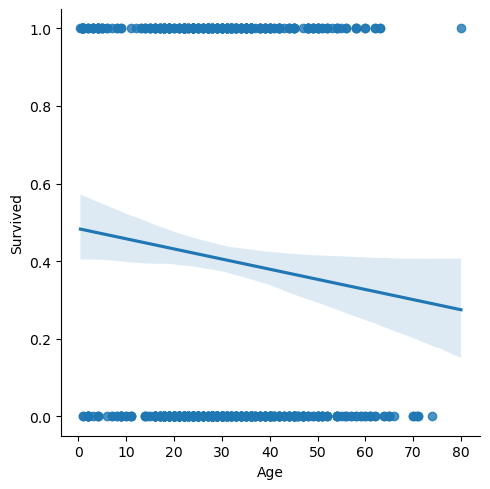

In [63]:
sns.lmplot(data=titanic,x='Age',y='Survived')

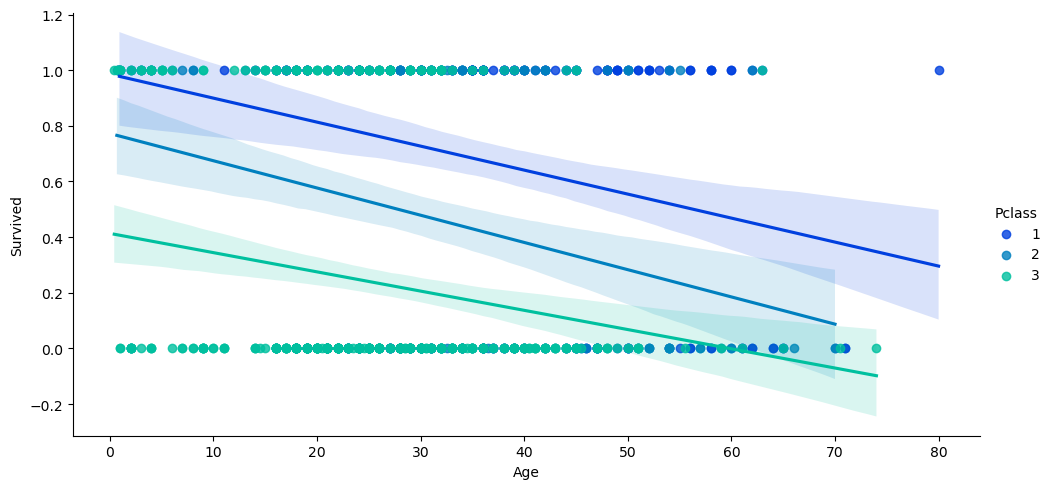

In [66]:
sns.lmplot(data=titanic,x='Age',y='Survived',hue='Pclass',palette='winter',aspect=2)

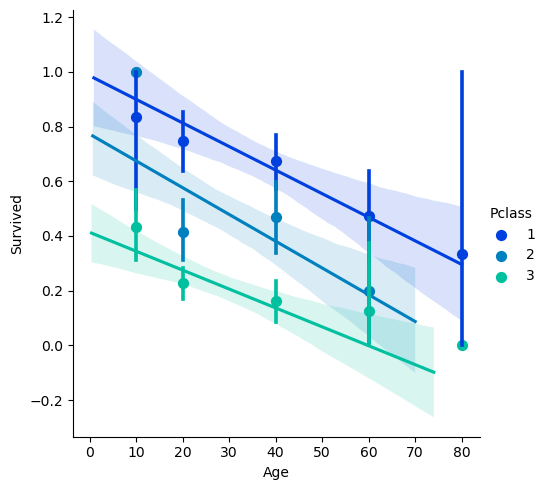

In [68]:
generations = [10,20,40,60,80]
sns.lmplot(data=titanic,x='Age',y='Survived',hue='Pclass',x_bins=generations,palette='winter')

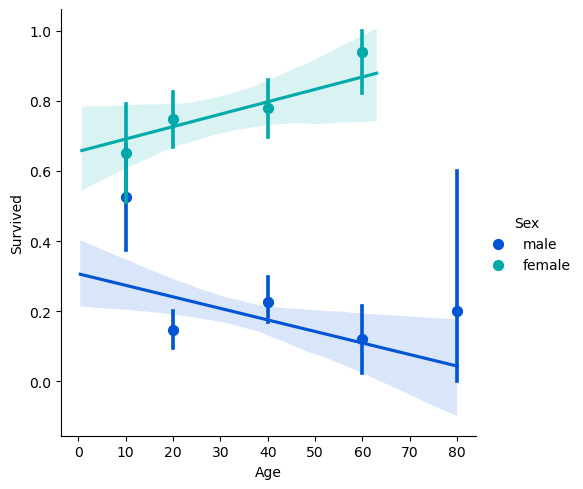

In [72]:
sns.lmplot(data=titanic,x='Age',y='Survived',hue='Sex',palette='winter',x_bins=generations)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following questions using pandas and seaborn:

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
2.) Did having a family member increase the odds of surviving the crash?

<Axes: xlabel='Cabin', ylabel='Count'>

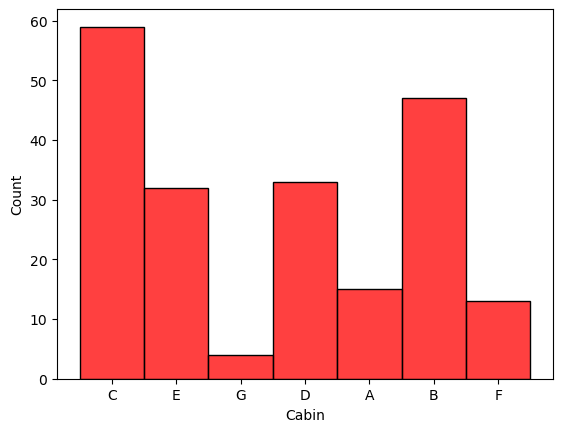

In [74]:
sns.histplot(data=cabin,x="Cabin",color='red')

In [76]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       661 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Maturity     891 non-null    object 
 13  Status       891 non-null    object 
 14  Survivor     891 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 104.5+ KB


In [81]:
titanic['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [93]:
cabin

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


In [95]:
cabin['Survived'] = titanic.Survived

C:\Users\asus\AppData\Local\Temp\ipykernel_2168\521368744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin['Survived'] = titanic.Survived


In [96]:
cabin

,Cabin,Survived
0,C,0
1,C,1
2,E,1
3,G,1
4,C,0
...,...,...
199,D,0
200,B,0
201,C,0
202,B,0


<Axes: xlabel='Survived', ylabel='Count'>

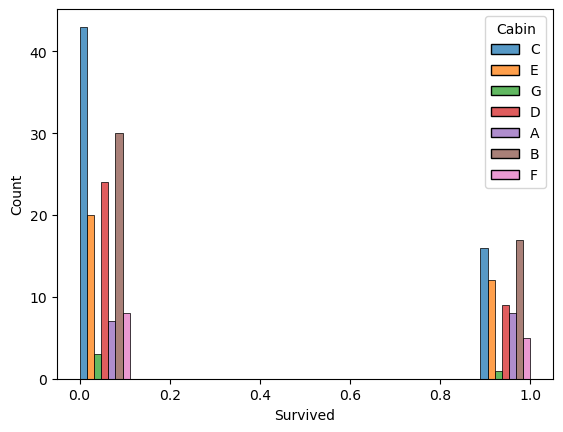

In [117]:
sns.histplot(data=cabin,x='Survived',hue='Cabin',multiple='dodge')

In [120]:
cabin["Cabin"] = pd.to_numeric(cabin["Cabin"],errors='coerce')

C:\Users\asus\AppData\Local\Temp\ipykernel_2168\908011891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin["Cabin"] = pd.to_numeric(cabin["Cabin"],errors='coerce')


In [121]:
cabin

,Cabin,Survived
0,NaN,0
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,0
...,...,...
199,NaN,0
200,NaN,0
201,NaN,0
202,NaN,0


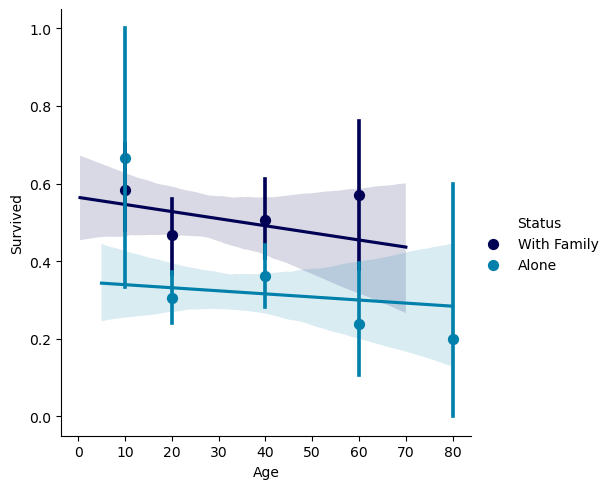

In [122]:
sns.lmplot(data=titanic,x='Age',y='Survived',hue='Status',palette='ocean',x_bins=generations)